<a href="https://colab.research.google.com/github/rhs329/boostcourse-3-/blob/main/4.2.1~4.2.3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [138]:
df = pd.read_csv("/content/diabetes_feature (1).csv")
df.shape

(768, 16)

In [139]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


In [140]:
from sklearn.model_selection import train_test_split

train_test_split?

In [141]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [142]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high','Insulin_log',
       'low_glu_insulin']]
X.shape

(768, 9)

In [143]:
y = df['Outcome']
y.shape

(768,)

In [144]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [145]:
X_train

,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_log,low_glu_insulin
60,84,0,0,0.0,0.304,21,False,4.639572,True
618,112,82,24,28.2,1.282,50,True,5.138735,False
346,139,46,19,28.7,0.654,22,False,4.430817,False
294,161,50,0,21.9,0.254,65,False,4.639572,False
231,134,80,37,46.2,0.238,46,False,5.916202,False
...,...,...,...,...,...,...,...,...,...
71,139,64,35,28.6,0.411,26,False,4.948760,False
106,96,122,0,22.4,0.207,27,False,4.639572,True
270,101,86,37,45.6,1.136,38,True,5.138735,False
435,141,0,0,42.4,0.205,29,False,5.138735,False


In [146]:
X_train.shape, y_train.shape

((614, 9), (614,))

In [147]:
X_test.shape, y_test.shape

((154, 9), (154,))

In [148]:
#DecisiontTree

In [ ]:
#single tree

In [149]:
#from sklearn.tree import DecisionTreeClassifier

#model = DecisionTreeClassifier(max_depth=11, random_state=42)
#model

DecisionTreeClassifier(max_depth=11, random_state=42)

In [183]:
#Bagging

#from sklearn.ensemble import RandomForestClassifier

#model = RandomForestClassifier(n_estimators = 100, random_state = 42)
#model

RandomForestClassifier(random_state=42)

In [ ]:
#Boosting

In [185]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42)
model

GradientBoostingClassifier(random_state=42)

In [186]:
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [187]:
model.feature_importances_

array([1.06409948e-01, 7.31424432e-03, 6.54835292e-02, 3.76351123e-02,
       2.62745825e-02, 9.46514767e-02, 1.56708089e-04, 6.62074399e-01,
       0.00000000e+00])

<Axes: >

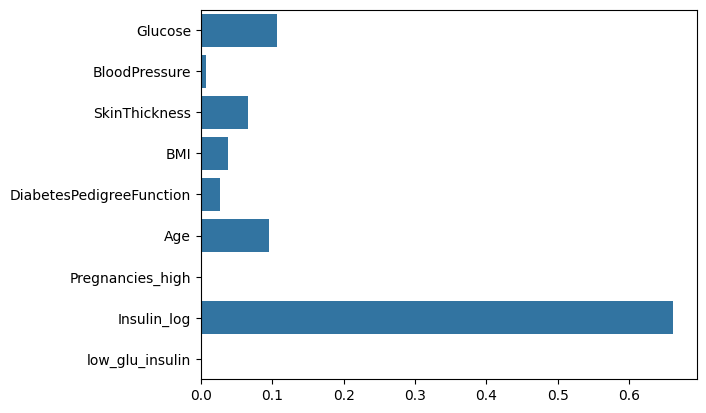

In [188]:
feature_names = X_train.columns.tolist()

sns.barplot(x=model.feature_importances_, y=feature_names)

In [189]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 0])

In [191]:
(y_predict != y_test).sum()

np.int64(23)

In [195]:
# 더 높은 성능을 기록함.
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.8506493506493507

In [181]:
#from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42)
model

GradientBoostingClassifier(random_state=42)

In [150]:
for max_depth in range(3,12):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    y_predict = model.fit(X_train, y_train).predict(X_test)
    score = accuracy_score(y_test, y_predict)*100
    print(max_depth,score)

3 85.06493506493507
4 87.66233766233766
5 85.06493506493507
6 81.81818181818183
7 81.16883116883116
8 81.81818181818183
9 83.11688311688312
10 78.57142857142857
11 81.81818181818183


In [151]:
#Grid Search

In [152]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier(random_state=42)
param_grid = {"max_depth": range(3, 12),
"max_features": [0.3, 0.5, 0.7, 0.9, 1]}
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=2)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
                         'max_features': [0.3, 0.5, 0.7, 0.9, 1]},
             verbose=2)

In [153]:
clf.best_params_

{'max_depth': 5, 'max_features': 0.7}

In [154]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=5, max_features=0.7, random_state=42)

In [155]:
clf.best_score_

np.float64(0.8648540583766493)

In [156]:
clf.predict(X_test)

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])

In [157]:
clf.score(X_test, y_test)

0.8701298701298701

In [158]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,0.011788,0.002855,0.008389,0.003401,5,0.7,"{'max_depth': 5, 'max_features': 0.7}",0.878049,0.910569,0.813008,0.837398,0.885246,0.864854,0.034990,1
7,0.014665,0.007468,0.005671,0.003389,4,0.7,"{'max_depth': 4, 'max_features': 0.7}",0.813008,0.886179,0.829268,0.861789,0.918033,0.861655,0.037935,2
8,0.008072,0.000807,0.003436,0.000654,4,0.9,"{'max_depth': 4, 'max_features': 0.9}",0.821138,0.886179,0.853659,0.853659,0.893443,0.861615,0.026005,3
18,0.020969,0.006093,0.005342,0.002304,6,0.9,"{'max_depth': 6, 'max_features': 0.9}",0.829268,0.894309,0.821138,0.878049,0.877049,0.859963,0.029149,4
27,0.006801,0.000176,0.003316,0.000110,8,0.7,"{'max_depth': 8, 'max_features': 0.7}",0.878049,0.878049,0.837398,0.853659,0.852459,0.859923,0.015871,5


In [159]:
# 최적의 하이퍼 파라미터 값 찾기

In [160]:
param_distributions = {"max_depth": range(2, 20),"max_features": [0.3, 0.5, 0.7, 0.9, 10]}
param_distributions

{'max_depth': range(2, 20), 'max_features': [0.3, 0.5, 0.7, 0.9, 10]}

In [161]:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV(model,
                         param_distributions,
                         n_iter=10,
                         scoring="accuracy",
                         n_jobs=-1,
                         cv=5,
                         random_state=42
                         )

clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': range(2, 20),
                                        'max_features': [0.3, 0.5, 0.7, 0.9,
                                                         10]},
                   random_state=42, scoring='accuracy')

In [162]:
clf.best_params_

{'max_features': 0.7, 'max_depth': 6}

In [163]:
clf.best_score_

np.float64(0.8566706650673064)

In [164]:
clf.score(X_test, y_test)

0.8571428571428571

In [165]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.011493,0.006642,0.005171,0.003104,0.7,6,"{'max_features': 0.7, 'max_depth': 6}",0.861789,0.869919,0.804878,0.894309,0.852459,0.856671,0.029389,1
5,0.006056,0.000278,0.003584,0.000092,0.5,7,"{'max_features': 0.5, 'max_depth': 7}",0.845528,0.886179,0.821138,0.853659,0.852459,0.851793,0.020810,2
9,0.016907,0.002313,0.008638,0.002218,10.0,10,"{'max_features': 10, 'max_depth': 10}",0.837398,0.878049,0.804878,0.853659,0.877049,0.850207,0.027300,3
7,0.010324,0.004442,0.007334,0.004926,0.3,15,"{'max_features': 0.3, 'max_depth': 15}",0.804878,0.869919,0.813008,0.869919,0.877049,0.846955,0.031251,4
3,0.011187,0.002751,0.011867,0.005082,0.3,16,"{'max_features': 0.3, 'max_depth': 16}",0.804878,0.869919,0.813008,0.869919,0.877049,0.846955,0.031251,4


In [ ]:
#랜덤 포레스트 학습

In [166]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [173]:
y_predict = model.predict(X_test)
y_predict[:5]

array([0, 0, 0, 0, 0])

In [177]:
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

<Axes: >

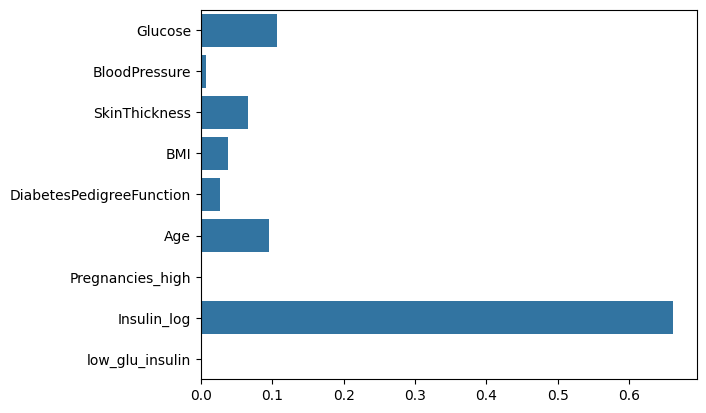

In [178]:
feature_names = X_train.columns.tolist()

sns.barplot(x=model.feature_importances_, y=feature_names)

In [ ]:
#정확도 측정

In [174]:
(y_predict != y_test).sum()

np.int64(28)

In [175]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.8181818181818182

In [167]:
feature_names = X_train.columns.tolist()

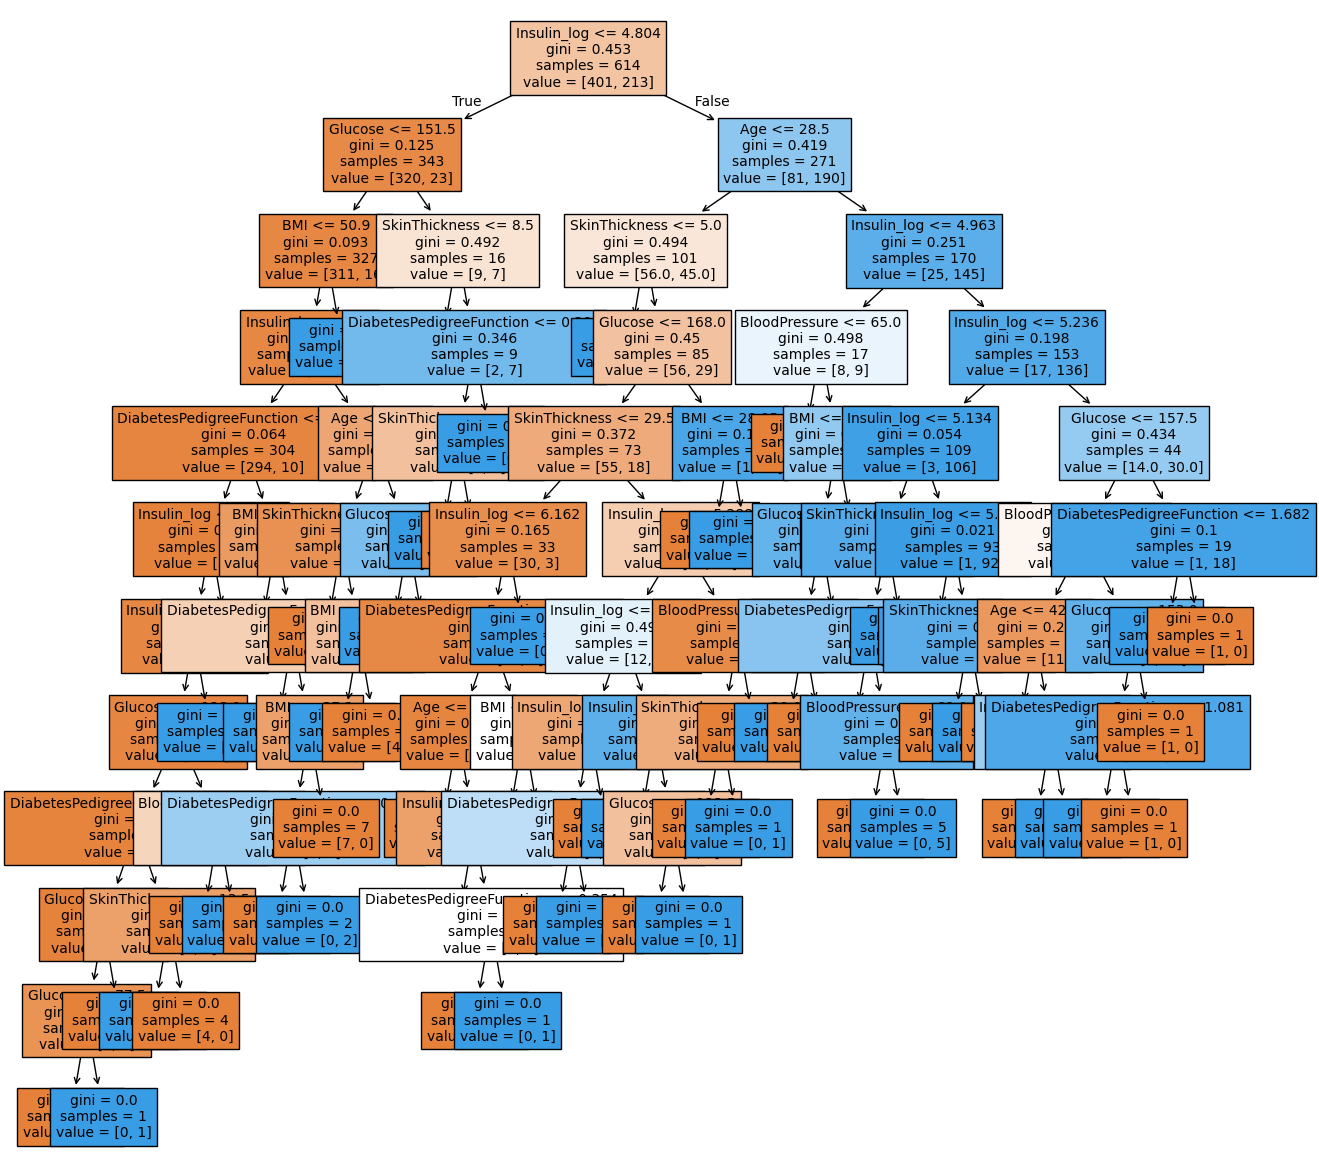

In [168]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,15))
tree = plot_tree(model, feature_names=feature_names, fontsize = 10, filled = True)

In [169]:
y_predict = model.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0])

In [170]:
#정확도

In [171]:
abs(y_predict - y_test).sum()

np.int64(28)

In [172]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) * 100

81.81818181818183

In [172]:
# 여러개의 알고리즘을 사용해서 비교하기

In [219]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

estimators = [DecisionTreeClassifier(random_state=42),
              RandomForestClassifier(random_state=42),
              GradientBoostingClassifier(random_state=42)
              ]
estimators

[DecisionTreeClassifier(random_state=42),
 RandomForestClassifier(random_state=42),
 GradientBoostingClassifier(random_state=42)]

In [198]:
from sklearn.tree import DecisionTreeClassifier

estimator = DecisionTreeClassifier(random_state=42)
estimator

DecisionTreeClassifier(random_state=42)

In [210]:
from sklearn.model_selection import RandomizedSearchCV

In [211]:
max_depth = np.random.randint(2, 20, 10)
max_depth

array([ 3, 16, 10, 17, 16, 17,  5,  8, 10, 18])

In [203]:
max_features = np.random.uniform(0.3, 1.0, 10)
max_features

array([0.82893941, 0.5886681 , 0.97689785, 0.49592936, 0.768974  ,
       0.33237907, 0.94475523, 0.79406094, 0.63034814, 0.89744241])

In [216]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {"max_depth": max_depth,
                       "max_features" : max_features}

clf = RandomizedSearchCV(estimator,
                   param_distributions,
                   n_iter=100,
                   scoring = "accuracy",
                   n_jobs=-1,
                   cv=5,
                   verbose=2
                   )

clf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': array([ 3, 16, 10, 17, 16, 17,  5,  8, 10, 18]),
                                        'max_features': array([0.82893941, 0.5886681 , 0.97689785, 0.49592936, 0.768974  ,
       0.33237907, 0.94475523, 0.79406094, 0.63034814, 0.89744241])},
                   scoring='accuracy', verbose=2)

In [217]:
clf.best_params_

{'max_features': np.float64(0.7689739988571496), 'max_depth': np.int64(5)}

In [218]:
clf.best_score_

np.float64(0.8648540583766493)